## Vivek Hirekar

## LGMVIP | Data Science

## Intermediate Level | Task 1: Exploratory Data Analysis on Dataset - Terrorism

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv' , low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(181691, 135)

In [6]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
df.rename(columns = {  'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'city':'City', 'region_txt':'Region', 'gname':'Group', 'motive':'Motive', 'nkill':'Kill', 'nwound':'Wound',
                       'summary':'Summary', 'target1':'Target1',  'attacktype1_txt':'attacktype1', 'weaptype1_txt':'weaptype1', 'targsubtype1_txt':'Targsubtype'}, inplace= True)

In [10]:
df.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [12]:
df_new= df[['Year','Month','Day','Country','City','Region','Group','Motive','Kill','Wound','Summary','Target1', 'attacktype1','weaptype1', 'Targsubtype']]
df_new.head()

,Year,Month,Day,Country,City,Region,Group,Motive,Kill,Wound,Summary,Target1,attacktype1,attacktype1,weaptype1,weaptype1,Targsubtype
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,MANO-D,NaN,1.0,0.0,NaN,Julio Guzman,1,Assassination,13,Unknown,Named Civilian
1,1970,0,0,Mexico,Mexico city,North America,23rd of September Communist League,NaN,0.0,0.0,NaN,"Nadine Chaval, daughter",6,Hostage Taking (Kidnapping),13,Unknown,"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,Philippines,Unknown,Southeast Asia,Unknown,NaN,1.0,0.0,NaN,Employee,1,Assassination,13,Unknown,Radio Journalist/Staff/Facility
3,1970,1,0,Greece,Athens,Western Europe,Unknown,NaN,NaN,NaN,NaN,U.S. Embassy,3,Bombing/Explosion,6,Explosives,Embassy/Consulate
4,1970,1,0,Japan,Fukouka,East Asia,Unknown,NaN,NaN,NaN,NaN,U.S. Consulate,7,Facility/Infrastructure Attack,8,Incendiary,Embassy/Consulate


In [13]:
df_new.shape

(181691, 17)

In [14]:
df_new.isnull().sum()/len(df_new)*100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
City            0.238867
Region          0.000000
Group           0.000000
Motive         72.171984
Kill            5.676120
Wound           8.977330
Summary        36.396409
Target1         0.350045
attacktype1     0.000000
attacktype1     0.000000
weaptype1       0.000000
weaptype1       0.000000
Targsubtype     5.709144
dtype: float64

In [15]:
df_new.drop(['Summary', 'Motive'], axis=1,inplace=True)

In [16]:
df_new

,Year,Month,Day,Country,City,Region,Group,Kill,Wound,Target1,attacktype1,attacktype1,weaptype1,weaptype1,Targsubtype
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,MANO-D,1.0,0.0,Julio Guzman,1,Assassination,13,Unknown,Named Civilian
1,1970,0,0,Mexico,Mexico city,North America,23rd of September Communist League,0.0,0.0,"Nadine Chaval, daughter",6,Hostage Taking (Kidnapping),13,Unknown,"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,Philippines,Unknown,Southeast Asia,Unknown,1.0,0.0,Employee,1,Assassination,13,Unknown,Radio Journalist/Staff/Facility
3,1970,1,0,Greece,Athens,Western Europe,Unknown,NaN,NaN,U.S. Embassy,3,Bombing/Explosion,6,Explosives,Embassy/Consulate
4,1970,1,0,Japan,Fukouka,East Asia,Unknown,NaN,NaN,U.S. Consulate,7,Facility/Infrastructure Attack,8,Incendiary,Embassy/Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Ceelka Geelow,Sub-Saharan Africa,Al-Shabaab,1.0,2.0,Checkpoint,2,Armed Assault,5,Firearms,Military Checkpoint
181687,2017,12,31,Syria,Jableh,Middle East & North Africa,Muslim extremists,2.0,7.0,Hmeymim Air Base,3,Bombing/Explosion,6,Explosives,Military Barracks/Base/Headquarters/Checkpost
181688,2017,12,31,Philippines,Kubentog,Southeast Asia,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Houses,7,Facility/Infrastructure Attack,8,Incendiary,House/Apartment/Residence
181689,2017,12,31,India,Imphal,South Asia,Unknown,0.0,0.0,Office,3,Bombing/Explosion,6,Explosives,Government Building/Facility/Office


In [17]:
df_new.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
Region             0
Group              0
Kill           10313
Wound          16311
Target1          636
attacktype1        0
attacktype1        0
weaptype1          0
weaptype1          0
Targsubtype    10373
dtype: int64

In [18]:
df_new['City'].fillna(value='Not specified', inplace=True)
df_new['Target1'].fillna(value='Unknown', inplace=True)
df_new['Targsubtype'].fillna(value='Not specified', inplace=True)

In [19]:
print(df_new['Kill'].mode())
print(df_new['Wound'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64


In [20]:
df_new['Kill']= df_new['Kill'].fillna(0)
df_new['Wound'] = df_new['Wound'].fillna(0)

In [21]:
df_new.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
Region             0
Group              0
Kill               0
Wound              0
Target1          636
attacktype1        0
attacktype1        0
weaptype1          0
weaptype1          0
Targsubtype    10373
dtype: int64

### Data Visualization¶

In [22]:
df_new['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Terrorist Activities Each Year

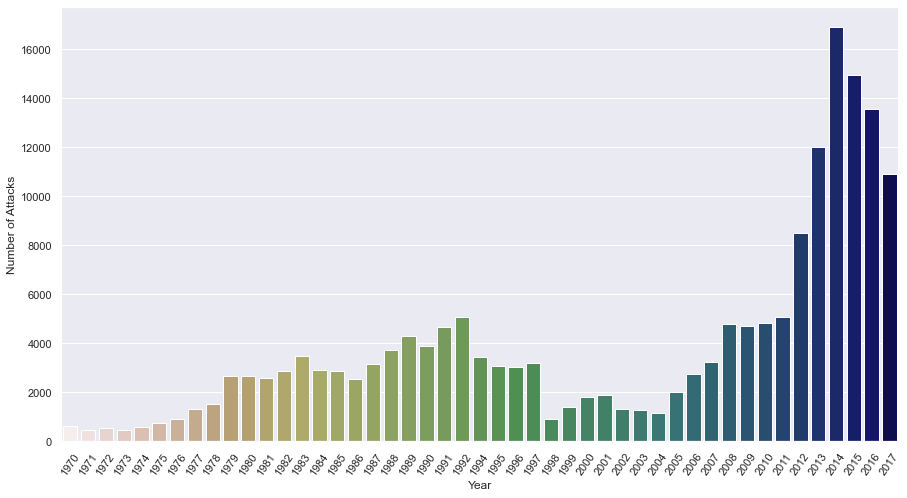

In [23]:
Year = df_new['Year'].unique()
count_of_years = df_new['Year'].value_counts().sort_index()
plt.figure(figsize=(15,8))
sns.barplot(x= Year, y= count_of_years, palette= 'gist_earth_r')
plt.xticks(rotation = 55)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [24]:
df_new.groupby(['Region']).count()['Kill']

Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Kill, dtype: int64

Text(0, 0.5, 'Casualities')

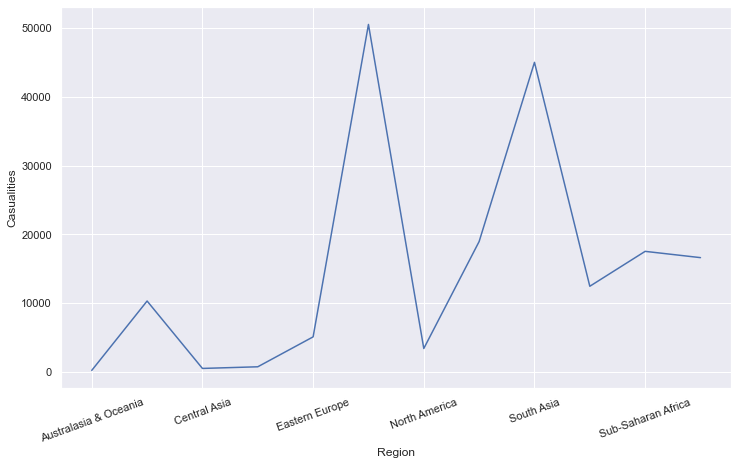

In [25]:
plt.subplots(figsize=(12,7))
df_new.groupby(['Region']).count()['Kill'].plot()
plt.xticks(rotation=20)
plt.ylabel('Casualities')

In [26]:
df_new.groupby(['Region']).count()['Wound']

Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Wound, dtype: int64

Text(0, 0.5, 'casualities')

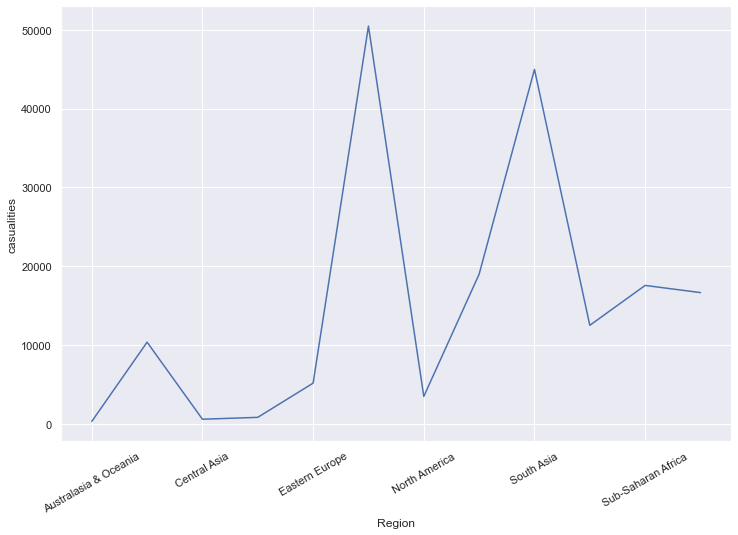

In [27]:
plt.subplots(figsize=(12,8))
df_new.groupby(['Region']).count()['Wound'].plot()
plt.xticks(rotation=30)
plt.ylabel('casualities')

### Countries Affected by Terror Attacks

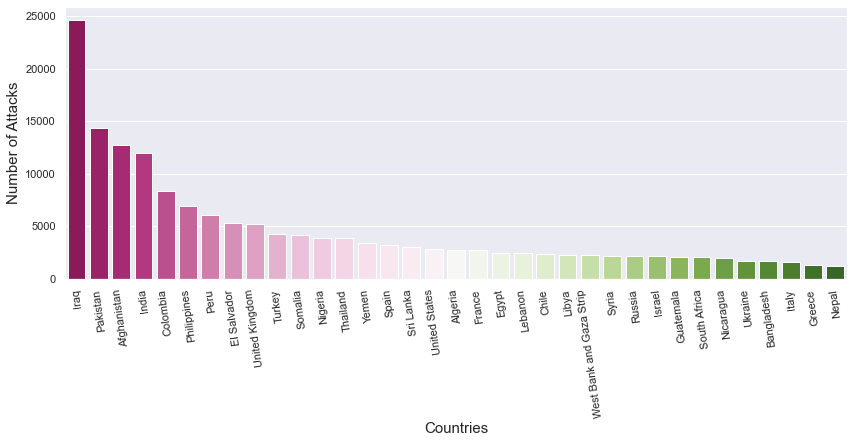

In [28]:
plt.subplots(figsize=(14,5))
sns.countplot('Country', data=df_new, palette='PiYG', order=df_new['Country'].value_counts()[:35].index)
plt.xticks(rotation=98)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()

### THANK YOU!